<a href="https://colab.research.google.com/gist/venkateshtantravahi/e915363fba9e3d59e8bc15c9c777b180/fakenewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting Fake News

###By using TF-IDF and PassiveAggressive Classifier


##What is Basically Fake News?
*A type of yellow journalism, fake news sums up the pieces of news that may be malicious deception and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by tricks, and users may end up in a filter bubble.*

##What is TF-IDF?
*TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.*

```
TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
Terminology
t — term (word)
d — document (set of words)
N — count of corpus
corpus — the total document set
```
###Term Frequency
This measures the frequency of a word in a document.
``` 
tf(t,d) = count of t in d / number of words in d
```
###Document Frequency
```
df(t) = occurrence of t in documents
```
###Inverse Document Frequency
IDF is the inverse of the document frequency which measures the informativeness of term t.
```
idf(t) = N/df
idf(t) = log(N/(df + 1))
```
###TF_IDF
```
tf-idf(t, d) = tf(t, d) * log(N/(df + 1))
```


#what is Passive Agressive Classifier?
*Passive Aggressive algorithms are **online learning **algorithms* \
The simplest Way of Explaining it is \
*Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

In my mind, in passive, the information hidden in the example is not enough for updating; in aggressive, the information shows that at lest this time you are wrong, a better model should modify this mistake.*

##What are online learning algorithms?
`
In computer science, online machine learning is a method of machine learning in which data becomes available in a sequential order and is used to update the best predictor for future data at each step, as opposed to batch learning techniques which generate the best predictor by learning on the entire training data set at once. Online learning is a common technique used in areas of machine learning where it is computationally infeasible to train over the entire dataset, requiring the need of out-of-core algorithms. It is also used in situations where it is necessary for the algorithm to dynamically adapt to new patterns in the data, or when the data itself is generated as a function of time, e.g., stock price prediction. Online learning algorithms may be prone to catastrophic interference, a problem that can be addressed by incremental learning approaches.
`
###Here are some links that you can refer for theory:

[link TF-IDF](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089) \
[link passiveAgressiveAlgo](https://venali.medium.com/conventional-guide-to-supervised-learning-with-scikit-learn-passive-aggressive-algorithms-ebf800f7fbcb) \

[link OnlineMachineLearning](https://en.wikipedia.org/wiki/Online_machine_learning)

###The Dataset
The dataset we’ll use for this python project- we’ll call it news.csv. This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE. \
You can get the dataset from the following link

[link Dataset](https://drive.google.com/file/d/1iFlK5TomvjjpB0-UEPeDMVE_j7l59mcz/view?usp=sharing)

In [2]:
#installing required libraries
!pip install numpy pandas sklearn

In [3]:
#importing required packages and libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#If you want to do it through colab notebook then upload the file to colab or mount the drive where the file is located
!unzip news.zip 

Archive:  news.zip
  inflating: news.csv                


In [5]:
#Read the datset
df=pd.read_csv('news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
#get the labels from the df
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [7]:
#split the data so that we can train and test the dataset 
#you can choose the way of splitting (but the most optimal way of splitting is 80-20)
#i.e 80% data on training and 20% data on testing
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [8]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

*Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.*

In [9]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


*We got an accuracy of 92.82% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives*
###What is a confusion Matrix?
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. \
Here you can find some good explanation about it
[ConfusionMatrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

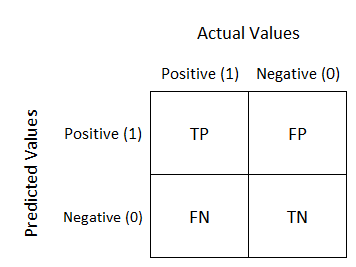

In [10]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 43, 586]])

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

